In [1]:
# Standard Python modules
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns

In [2]:
# Set up paths
home = Path.home()                 # users home directory
root = home/'repos'/'montini-phd'    # project root directory
path_to_data = root/'data'           # data directory (input data, read only)
path_to_out = root/'out'             # directory for storing numerical results and intermediate datafiles (read & write
path_to_figs = root/'figs'           # directory for storing figures

# Path to modules directory
path_to_mods = os.fspath(root/'modules')
sys.path.append(path_to_mods)

# Import my modules



In [7]:
filepath = path_to_out / 'sallj-types-ndjfm.csv'
df = pd.read_csv(filepath)

# set up datetime index
df['DATE'] = pd.to_datetime(df['DATE'])
dates = df.DATE.values
df = df.set_index('DATE')

df.head()

,LLJ_CAT
DATE,
1979-11-01 09:00:00,0
1979-11-02 09:00:00,0
1979-11-03 09:00:00,0
1979-11-04 09:00:00,0
1979-11-05 09:00:00,0


In [8]:
## Total typecount (1979-2016)

lljtypes = df.LLJ_CAT.values
typelist = [1, 2, 3, 4]
ntypes = len(typelist)

# method 1
type_count1 = df['LLJ_CAT'].value_counts()
print(type_count1)

# method 2
type_count2 = np.empty(ntypes, dtype=int)
for k, cat in enumerate(typelist):
    idx = (lljtypes == cat)
    tmp = lljtypes[idx]
    type_count2[k] = len(tmp) 
    print(cat, type_count2[k])

# percentages
totdays = np.sum(type_count2)
type_freq = type_count2 / totdays
print(type_freq*100)


0    3832
1     473
3     466
2     443
4     383
Name: LLJ_CAT, dtype: int64
1 473
2 443
3 466
4 383
[26.79886686 25.09915014 26.40226629 21.69971671]


In [9]:
## Count number of each LLJ type per year

years = np.arange(1979, 2017)   # list of years
nyrs = len(years)-1               # number of years
typecount_per_yr = np.empty((nyrs,ntypes))

# Loop to count and tag LLJ events each year
for i in range(nyrs):
    # index first and last day of season
    start_date = pd.to_datetime("{}-11-01 9:00".format(years[i]))
    end_date = pd.to_datetime("{}-03-31 9:00".format(years[i+1]))
    # select rows by date using df.loc[start_date:end_date]
    tmp = df.loc[start_date:end_date]
    # extract llj time series
    x = tmp['LLJ_CAT'].values
    
    # loop to count frequency of each LLJ type
    for j, cat in enumerate(typelist):
        idx = (x == cat)
        tmp = x[idx]
        typecount_per_yr[i,j] = len(tmp)
        

In [11]:
# Convert annual counts of each type from array to pd dataframe

data = {'years':years[0:-1],
        'llj_type1': typecount_per_yr[:,0],
        'llj_type2': typecount_per_yr[:,1],
        'llj_type3': typecount_per_yr[:,2],
        'llj_type4': typecount_per_yr[:,3]}

df_ann= pd.DataFrame(data)
df_ann.describe()

,years,llj_type1,llj_type2,llj_type3,llj_type4
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1997.000000,12.783784,11.972973,12.594595,10.351351
std,10.824355,4.197454,5.035907,5.997497,3.560713
min,1979.000000,6.000000,3.000000,3.000000,3.000000
25%,1988.000000,9.000000,8.000000,8.000000,9.000000
50%,1997.000000,13.000000,11.000000,12.000000,10.000000
75%,2006.000000,15.000000,15.000000,16.000000,13.000000
max,2015.000000,22.000000,21.000000,27.000000,17.000000


<Figure size 432x288 with 0 Axes>

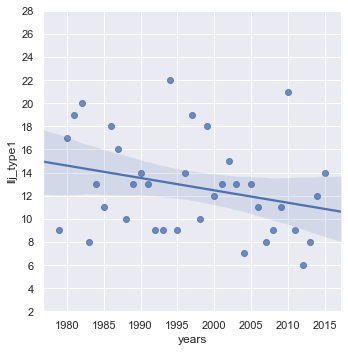

In [29]:
# set seaborn style
sns.set()
#sns.set_style("ticks", {'patch.force_edgecolor':False})

# plot time series

plt.figure()
sns.lmplot(x='years',y="llj_type1",data=df_ann)
yticks=np.arange(2,29,2)
plt.ylim(2,28)
plt.yticks(yticks)

outfile = home/'Desktop'/'trend1.png'
plt.savefig(outfile)

<Figure size 432x288 with 0 Axes>

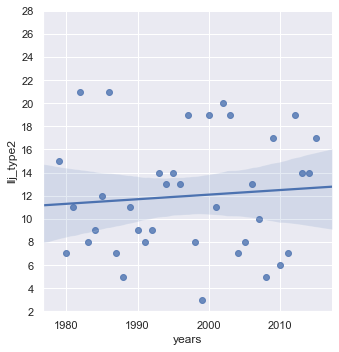

In [30]:
plt.figure()
sns.lmplot(x='years',y="llj_type2",data=df_ann)
yticks=np.arange(2,29,2)
plt.ylim(2,28)
plt.yticks(yticks)

outfile = home/'Desktop'/'trend2.png'
plt.savefig(outfile)

<Figure size 432x288 with 0 Axes>

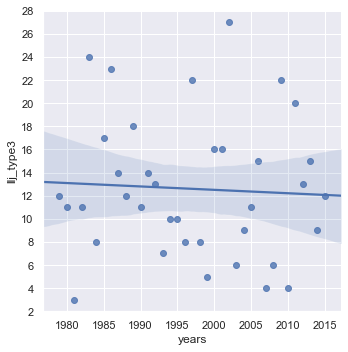

In [31]:
plt.figure()
sns.lmplot(x='years',y="llj_type3",data=df_ann)
yticks=np.arange(2,29,2)
plt.ylim(2,28)
plt.yticks(yticks)

outfile = home/'Desktop'/'trend3.png'
plt.savefig(outfile)

<Figure size 432x288 with 0 Axes>

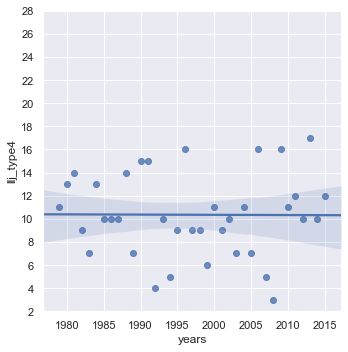

In [32]:
plt.figure()
sns.lmplot(x='years',y="llj_type4",data=df_ann)
yticks=np.arange(2,29,2)
plt.ylim(2,28)
plt.yticks(yticks)

outfile = home/'Desktop'/'trend4.png'
plt.savefig(outfile)

In [ ]:
# # Set up variables/arrays
# df['LLJ_TAGS'] = 0              # new df column for storing llj event tags
# years = np.arange(1979, 2017)   # list of years
# nyrs = len(years)               # number of years
# run_count = 0                   # running count of llj events

# # Loop to count and tag LLJ events each year
# for k in range(nyrs-1):

#     # index first and last day of season
#     start_date = pd.to_datetime("{}-11-01 9:00".format(years[k]))
#     end_date = pd.to_datetime("{}-03-31 9:00".format(years[k+1]))

#     # select rows by date using df.loc[start_date:end_date]
#     tmp = df.loc[start_date:end_date]
    
#     # extract llj time series
#     x = tmp['LLJ'].values

#     # function to count/tag consecutive events in x
#     tags, count = cluster(x)

#     # Update tags to be continuous from year to year
#     idx = (tags > 0)        
#     tags[idx] += run_count

#     # Store tags in df
#     df.loc[start_date:end_date, 'LLJ_TAGS'] = tags
    
#     # update running count
#     run_count += count

    
# # Print results
# print("Number of independent LLJ events: ", run_count)
# df.head(15)

